In [ ]:
# From: https://towardsdatascience.com/machine-learning-sentiment-analysis-and-word-embeddings-python-keras-example-4dfb93c5a6cf

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('dark_background')
from keras.datasets import imdb
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, GlobalAveragePooling1D, Dense

Using TensorFlow backend.


In [2]:
num_words = 10000

In [6]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

print("Training entries: {}, labels: {}".format(len(X_train), len(y_train)))

17465344/17464789 [==============================] - 4s 0us/step
Training entries: 25000, labels: 25000


In [8]:
print(X_train[0]) #Already encoded review

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [11]:
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])



In [12]:
print(decode_review(X_train[0])) #Decoded review

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

In [13]:
#The reviews should be the same length
len(X_train[0]), len(X_train[1]) #they are not

(218, 189)

In [14]:
# We use padding to make them the same length
X_train = pad_sequences(
    X_train,
    value=word_index["<PAD>"],
    padding='post',
    maxlen=256
)

X_test = pad_sequences(
    X_test,
    value=word_index["<PAD>"],
    padding='post',
    maxlen=256
)

In [15]:
#Now they are the same length
len(X_train[0]), len(X_train[1])

(256, 256)

In [17]:
# To prevent one hot encoding for all the possible words we need an embedding
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=16, input_length=256))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 256, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [31]:
# We use adam as our optimizer and binary crossentropy as our loss function since we’re trying to choose between two classes.
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [32]:
# For every epoch 512 reviews pass through the neural network before updating the weights
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.1,
    shuffle=True
)

Train on 22500 samples, validate on 2500 samples
Epoch 1/20
22500/22500 [==============================] - 3s 120us/step - loss: 5.6241e-05 - acc: 1.0000 - val_loss: 1.4025 - val_acc: 0.8560
Epoch 2/20
22500/22500 [==============================] - 3s 114us/step - loss: 5.4831e-05 - acc: 1.0000 - val_loss: 1.4113 - val_acc: 0.8556
Epoch 3/20
22500/22500 [==============================] - 3s 112us/step - loss: 4.5067e-05 - acc: 1.0000 - val_loss: 1.4187 - val_acc: 0.8564
Epoch 4/20
22500/22500 [==============================] - 2s 111us/step - loss: 4.0612e-05 - acc: 1.0000 - val_loss: 1.4285 - val_acc: 0.8564
Epoch 5/20
22500/22500 [==============================] - 3s 113us/step - loss: 3.3747e-05 - acc: 1.0000 - val_loss: 1.4365 - val_acc: 0.8568
Epoch 6/20
22500/22500 [==============================] - 3s 132us/step - loss: 3.1992e-05 - acc: 1.0000 - val_loss: 1.4472 - val_acc: 0.8564
Epoch 7/20
22500/22500 [==============================] - 3s 140us/step - loss: 3.1684e-05 - acc: 1

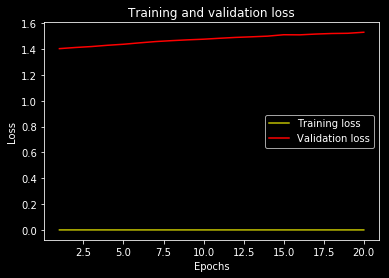

In [33]:
# We can plot the training and validation accuracy and loss at each epoch by using the history variable returned by the fit function.
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

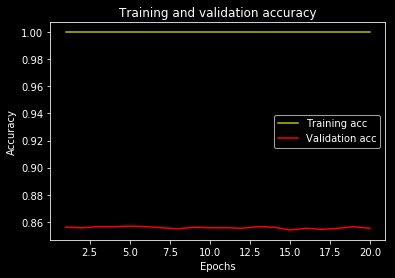

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
# Assessing performance on the testing set

test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

25000/25000 [==============================] - 2s 64us/step
0.83528
